# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Simple Linear Regression

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
# Create dummy dataset for regression

X,y = make_regression(n_samples=1000, n_features=1,n_informative=1,bias=4.5,noise=30,random_state=101 )

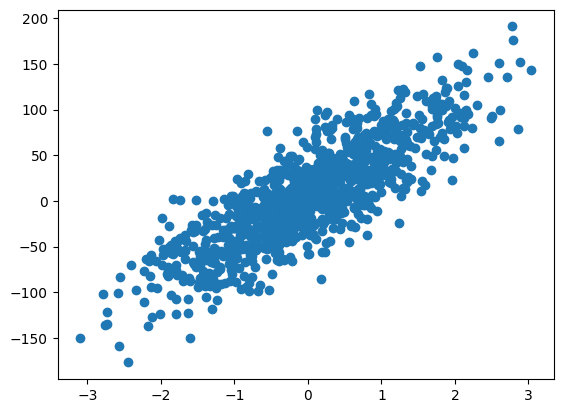

In [3]:
# Scatter Plot 

plt.scatter(X,y)

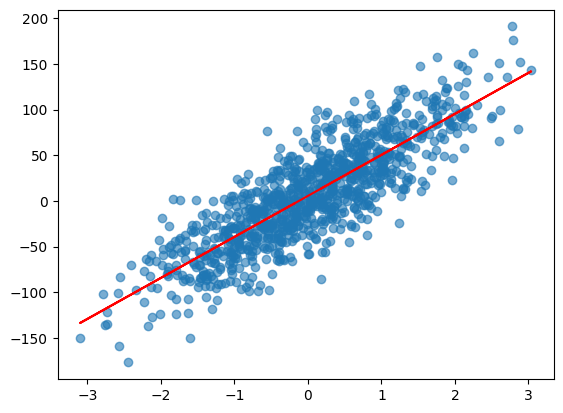

In [4]:
# Linear Regression using Sci-kit learn library

from sklearn.linear_model import LinearRegression  # import library

lr = LinearRegression() # create object

lr.fit(X,y) # fit

y_pred = lr.predict(X) # predict

plt.scatter(X,y,alpha=0.6) 
plt.plot(X,y_pred,"r")  # draw regression line

In [5]:
# OLS Table

import statsmodels.api as sm

X_b = sm.add_constant(X)

print(sm.OLS(y,X_b).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2398.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):          1.17e-267
Time:                        18:17:57   Log-Likelihood:                -4836.8
No. Observations:                1000   AIC:                             9678.
Df Residuals:                     998   BIC:                             9687.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5255      0.966      5.721      0.0

In [6]:
# y = mx + b 
# b , m coefficients

lr.coef_, lr.intercept_

(array([44.9111499]), 5.525465527813916)

In [7]:
# Model Performance Metrics

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r_2 = r2_score(y,y_pred)
mse = mean_squared_error(y,y_pred)
mae = mean_absolute_error(y,y_pred)
rmse = mse**0.5
print("R2 \t:",r_2)
print("MSE \t:", mse)
print("MAE \t:",mae)
print("RMSE \t:",rmse)

R2 	: 0.7061550590643708
MSE 	: 930.475092354669
MAE 	: 24.39098669074243
RMSE 	: 30.50368981540871


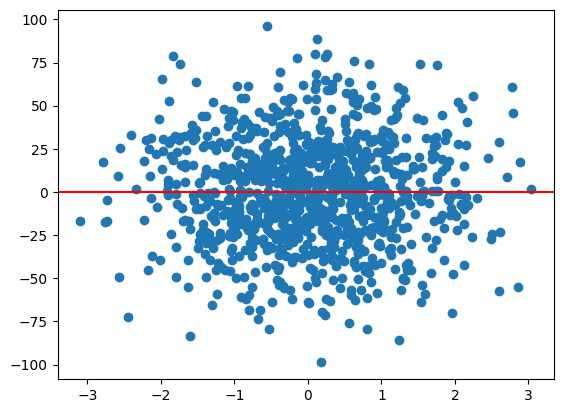

In [8]:
# Residual Analysis

residuals = y-y_pred #artıklar
plt.scatter(X,residuals)
plt.axhline(0,color="red")

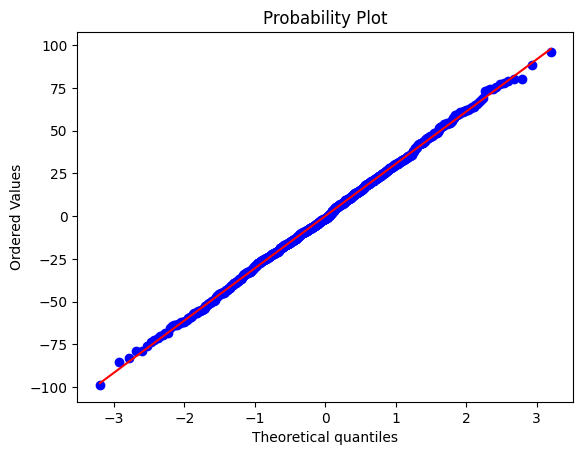

ShapiroResult(statistic=0.9991466403007507, pvalue=0.9375022649765015)

In [9]:
# Normality test for residuals

from scipy import stats as stats
import pylab

stats.probplot(residuals,dist="norm", plot=pylab)

plt.show()


stats.shapiro(residuals)

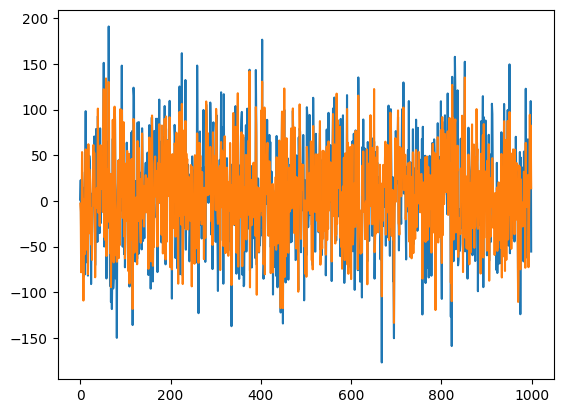

In [34]:
plt.plot(range(1000),y)
plt.plot(range(1000),y_pred)

In [10]:
def lr_predict_interval(value, std):
    
    interval = lr.predict(value) - 2*std , lr.predict(value) + 2*std
    return interval

def lr_predict(value):
    
    prediction = lr.predict(value) 
    return prediction

[95.34776532]
(array([34.34038569]), array([156.35514495]))


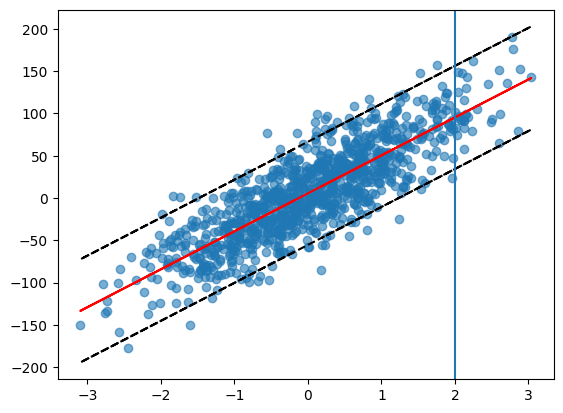

In [11]:
print(lr_predict([[2]]))

print("======"*8)

print(lr_predict_interval([[2]], rmse))


plt.scatter(X,y,alpha=0.6)
plt.plot(X,y_pred,"r")
plt.plot(X,y_pred-(2*rmse) ,"k", linestyle="dashed")
plt.plot(X,y_pred+(2*rmse) ,"k", linestyle="dashed")

plt.axvline(2)

# !Thanks